In [1]:
import sympy
from sympy import  Point, Line, Plane, Point3D, Eq, Matrix, S, Symbol, symbols,\
latex, simplify
from IPython.display import display, Latex

# Практическое занятие 7
# Компьютерный практикум по алгебре на Python
https://docs.sympy.org/latest/search.html?q=geometry

## Прямые и плоскости в пространстве. Модуль Geometry
### Задание 1.
Даны точки: $A(3, -2, 3)$,  $B(-2, 3, 1)$, $C(1, -8, 6)$, $D(1, 2, 4)$, $F(-7, 8, -1)$.

Составить словарь точек (ключи - точки, значения - имена точек).

Вывести на экран значения записей словаря (т.е. имена точек).

Проверить, различны ли прямые $AB$ и $AF$, $AB$ и $AC$, $ABC$ и $ACF$, $ABC$ и $ACD$.

Вывести на экран текст вида "$AB$ и $AF$ одинаковы" (или "не одинаковы").

In [3]:
A = Point(3, -2, 3)
B = Point(-2, 3, 1)
C = Point(1, -8, 6)
D = Point(1, 2, 4)
F = Point(-7, 8, -1)

points = {point_name: point for point_name, point in zip(('A','B','C','D','F'), (A, B, C, D, F))}
for i in points:
  display(i)

AB = Line(A, B)
AF = Line(A, F)
AC = Line(A, C)
ABC = Plane(A, B, C)
ACF = Plane(A, C, F)
ACD = Plane(A, C, D)

display('AB и AF ' + (Line.equals(AB, AF) == 0) * 'не ' + 'одинаковы')
display('AB и AC ' + (Line.equals(AB, AC) == 0) * 'не ' + 'одинаковы')
display('ABC и ACF ' + (Plane.equals(ABC, ACF) == 0) * 'не ' + 'одинаковы')
display('ABC и ACD ' + (Plane.equals(ABC, ACD) == 0) * 'не ' + 'equодинаковыal')

'A'

'B'

'C'

'D'

'F'

'AB и AF одинаковы'

'AB и AC не одинаковы'

'ABC и ACF одинаковы'

'ABC и ACD не equодинаковыal'

###  Задание 2
Вывести на экран уравнение плоскости ACD и расстояние от оставшихся точек до этой плоскости.

In [4]:
display(Latex(f'\\text{{Уравнение ACD: }}{latex(ACD.equation())}'))
display(Latex(f'\\text{{Расстояние от  F до  ACD: }}{latex(ACD.distance(F))}'))
display(Latex(f'\\text{{Расстояние от  B до  ACD: }}{latex(ACD.distance(B))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###  Задание 2*
Вывести на экран уравнения плоскостей, в которых лежит ровно три точки из Задания 1. Затем вывести на экран расстояние от оставшихся точек до каждой их этих плоскостей.

Можно по желанию воспользоваться результатами Задания 1 для упрощения поиска.

In [30]:
A = Point(3, -2, 3)
B = Point(-2, 3, 1)
C = Point(1, -8, 6)
D = Point(1, 2, 4)
F = Point(-7, 8, -1)

# are_coplanar
already = set()
points = {point: point_name for point, point_name in zip((A, B, C, D, F), ('A','B','C','D','F'))}
for point1 in points:
  for point2 in points:
    for point3 in points:
      for point4 in points:
        for point5 in points:
          if point1 != point2 and point1 != point3 and point1 != point4 and point1 != point5 and \
             point2 != point3 and point2 != point4 and point2 != point5 and point3 != point4 and \
             point3 != point5 and point4 != point5:
             if not(Point3D.are_collinear(point1, point2, point3)):
              plane_ = Plane(point1, point2, point3)
              if plane_.distance(point4) != 0 and plane_.distance(point5) != 0:
                eq_plane = simplify(Eq(plane_.equation(), 0))
                if eq_plane not in already:
                  display(Latex(f'\\text{{Уравнение плоскости: }}{latex(eq_plane)}'))
                already.add(eq_plane)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###  Задание 3
Построить плоскость, перпендикулярную плоскости $ABC$, проходящую через $D$ и начало координат. Найти линию пересечения $ABC$ и этой плоскости.

Вывести на экран уравнение полученной плоскости и уравнения линии пересечения $ABC$ и этой плоскости.

In [3]:
A = Point(3, -2, 3)
B = Point(-2, 3, 1)
C = Point(1, -8, 6)
D = Point(1, 2, 4)
point_zero = Point(0, 0, 0)

ABC = Plane(A, B, C)
alpha = ABC.perpendicular_plane(point_zero, D)

eq_alpha = Eq(alpha.equation(), 0)
point_of_line = ABC.intersection(alpha)
display(Latex(f'\\text{{Уравнение плоскости alpha: }}{latex(eq_alpha)}'))
display(Latex(f'\\text{{Прямая - пересечение ABC и alpha: }}{latex(point_of_line)}'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###  Задание 4
Найти пересечение плоскости $ABC$ и прямой $DK$, где $K(3,-2, 3)$. Проверить с помощью словаря точек, не является ли точка пересечения одной из заданных точек.

In [14]:
A = Point(3, -2, 3)
B = Point(-2, 3, 1)
C = Point(1, -8, 6)
D = Point(1, 2, 4)
K = Point(3, -2, 3)

new_point = ABC.intersection(Line(D, K))[0]
display(Latex(f'\\text{{Точка пересечения: }}{latex(new_point)}'))
points = {point_name: point for point_name, point in zip(('A','B','C','D','K'), (A, B, C, D, K))}
there_is_k = False
for i in points:
  if new_point == points[i]:
    there_is_k = True
    display(f'Point of intersection is {i}')
if not(there_is_k):
  display('K is not A, B, C, D')

<IPython.core.display.Latex object>

'Point of intersection is A'

'Point of intersection is K'

###  Задание 5
Построить плоскость, параллельную плоскости $ABC$, проходящую через точку $M(-1, 6, 3)$, вывести на экран ее уравнение.

Найти и вывести на экран расстояние от прямой $AB$ до построенной плоскости.

In [15]:
A = Point(3, -2, 3)
B = Point(-2, 3, 1)
C = Point(1, -8, 6)
M = Point(-1, 6, 3)

alpha = ABC.parallel_plane(M)
display(Latex(f'\\text{{Уравнение плоскости: }}{latex(Eq(alpha.equation(), 0))}'))

AB_to_alpha = alpha.distance(Line(A, B))
display(Latex(f'\\text{{Расстояние между плоскостью и прямой AB: }}{latex(AB_to_alpha)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###  Задание 6*
Даны точки: $A(3, -2, 3)$,  $B(-2, 3, 1)$, $C(1, -8, 6)$, $D(1, 2, 4)$, $F(-7, 8, -1)$.

Составить словарь всех прямых (в нем должны быть и прямая $AB$, и $BA$!), каждая из которых проходит хотя бы через две заданные точки, ключ - сама прямая (Line), значение - список из имен ВСЕХ точек, лежащих на этой прямой. Вывести на экран имена только тех прямых, на которых лежит не менее трех точек из условия, а также список точек, лежащих на прямой.

In [42]:
A = Point(3, -2, 3)
B = Point(-2, 3, 1)
C = Point(1, -8, 6)
D = Point(1, 2, 4)
F = Point(-7, 8, -1)

points = {name: point for name, point in zip(('A','B','C','D','F'), (A, B, C, D, F))}

lines = dict()

for name1, point1 in zip(('A','B','C','D','F'), (A, B, C, D, F)):
  for name2, point2 in zip(('A','B','C','D','F'), (A, B, C, D, F)):
    if point1 != point2:
      name = name1 + name2
      line = Line(point1, point2)
      lines[name] = line

for line in lines:
  points_in_line = []
  for name, point in zip(('A','B','C','D','F'), (A, B, C, D, F)):
    if lines[line].distance(point) == 0:
      points_in_line.append(name)
  if len(points_in_line) > 2:
    display(Latex(f'\\text{{На прямой }}{latex(line)}\\text{{ лежат точки: }}{latex(points_in_line)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Индивидуальное задание

Даны точки: $A$,  $B$, $C$, $D$, $F$.

Составить словарь с ключами - точками (например, Point3D(3, 2, 1)) и значениями - именами точек ('A', 'B' и т.д.). Найти и вывести на экран

>расстояние от точек $D$ и $F$ до плоскости $ABC$,

>уравнение плоскости $ABC$,

>параметрические уравнения прямой $DF$.

Определить и вывести на экран, какие 4 из заданных точек лежат в одной плоскости (пользуясь словарем точек, вывести имена точек).

Определить и вывести на экран, какие 3 из заданных точек лежат на одной прямой (пользуясь словарем точек, вывести имена точек).

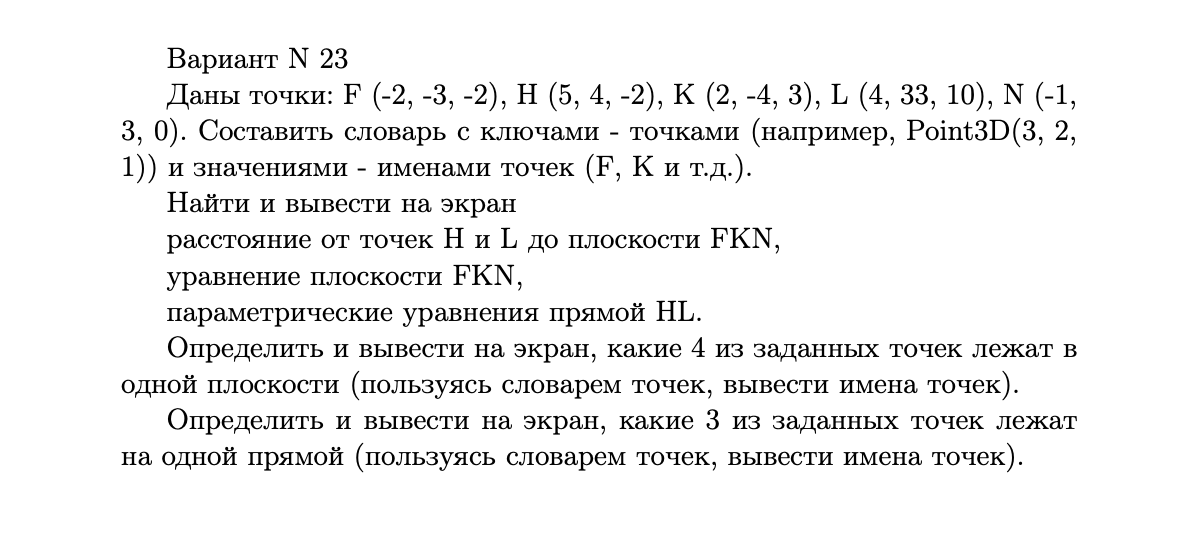

In [74]:
def get_key(d, value):
    for k, v in d.items():
        if v == value: return k

points = {point: name for point, name in zip((Point3D(-2, -3, -2), Point3D(5, 4, -2), Point3D(2, -4, 3),
                                              Point3D(4, 33, 10), Point3D(-1, 3, 0)),
                                             ('F', 'H', 'K', 'L', 'N'))}

FKN = Plane(get_key(points, 'F'), get_key(points, 'K'), get_key(points, 'N'))
distance_to_H = FKN.distance(get_key(points, 'H'))
distance_to_L = FKN.distance(get_key(points, 'L'))

display(Latex(f'\\text{{Расстояние от точки H до плоскости FKN: }}{latex(distance_to_H)}'))
display(Latex(f'\\text{{Расстояние от точки L до плоскости FKN: }}{latex(distance_to_L)}'))
display(Latex(f'\\text{{Уравнение плоскости FKN: }}{latex(Eq(FKN.equation(), 0))}'))

points_name_plane = set()
points_name_line = set()
for point1 in points:
  for point2 in points:
    for point3 in points:
      if point1 != point2 and point1 != point3 and point2 != point3:
        if Point3D.are_collinear(point1, point2, point3):
          point_sort1 = sorted(str(points[point1] + points[point2] + points[point3]))
          points_name_line.add(str(point_sort1))

        for point4 in points:
          if point1 != point4 and point2 != point4 and point3 != point4:
              if Point3D.are_coplanar(point1, point2, point3, point4):
                point_sort = sorted(str(points[point1] + points[point2] + points[point3] + points[point4]))
                points_name_plane.add(str(point_sort))
print()
for i in points_name_plane:
  display(Latex(f'\\text{{Лежат в одной плоскости: }}{latex(i)}'))
print()
for i in points_name_line:
  display(Latex(f'\\text{{Лежат на одной прямой: }}{latex(i)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>